In [64]:
%load_ext autoreload
%autoreload 2
%matplotlib widget
from data_processing import *
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import optuna

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [68]:
### Load data
data_dir = "../01_Datenaufbereitung/Output/Calculated/"
all_data = load_data(data_dir)


Found 15 parquet files


Processing cells:   0%|          | 0/15 [00:00<?, ?cell/s]

Processing C01 ...


e:\00_Thesis\04_NNs\data_processing.py:44: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_hourly['SOH_ZHU'] = data_hourly['SOH_ZHU'].fillna(1)
Processing cells:   7%|▋         | 1/15 [00:14<03:20, 14.32s/cell]

Processing C03 ...


e:\00_Thesis\04_NNs\data_processing.py:44: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_hourly['SOH_ZHU'] = data_hourly['SOH_ZHU'].fillna(1)
Processing cells:  13%|█▎        | 2/15 [00:25<02:40, 12.36s/cell]

Processing C05 ...


e:\00_Thesis\04_NNs\data_processing.py:44: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_hourly['SOH_ZHU'] = data_hourly['SOH_ZHU'].fillna(1)
Processing cells:  20%|██        | 3/15 [00:36<02:19, 11.65s/cell]

Processing C07 ...


e:\00_Thesis\04_NNs\data_processing.py:44: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_hourly['SOH_ZHU'] = data_hourly['SOH_ZHU'].fillna(1)
Processing cells:  27%|██▋       | 4/15 [00:46<02:02, 11.10s/cell]

Processing C09 ...


e:\00_Thesis\04_NNs\data_processing.py:44: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_hourly['SOH_ZHU'] = data_hourly['SOH_ZHU'].fillna(1)
Processing cells:  33%|███▎      | 5/15 [00:50<01:27,  8.76s/cell]

Processing C11 ...


e:\00_Thesis\04_NNs\data_processing.py:44: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_hourly['SOH_ZHU'] = data_hourly['SOH_ZHU'].fillna(1)
Processing cells:  40%|████      | 6/15 [00:56<01:09,  7.73s/cell]

Processing C13 ...


e:\00_Thesis\04_NNs\data_processing.py:44: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_hourly['SOH_ZHU'] = data_hourly['SOH_ZHU'].fillna(1)
Processing cells:  47%|████▋     | 7/15 [00:58<00:46,  5.85s/cell]

Processing C15 ...


e:\00_Thesis\04_NNs\data_processing.py:44: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_hourly['SOH_ZHU'] = data_hourly['SOH_ZHU'].fillna(1)
Processing cells:  53%|█████▎    | 8/15 [01:01<00:33,  4.85s/cell]

Processing C17 ...


e:\00_Thesis\04_NNs\data_processing.py:44: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_hourly['SOH_ZHU'] = data_hourly['SOH_ZHU'].fillna(1)
Processing cells:  60%|██████    | 9/15 [01:10<00:37,  6.25s/cell]

Processing C19 ...


e:\00_Thesis\04_NNs\data_processing.py:44: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_hourly['SOH_ZHU'] = data_hourly['SOH_ZHU'].fillna(1)
Processing cells:  67%|██████▋   | 10/15 [01:19<00:34,  6.96s/cell]

Processing C21 ...


e:\00_Thesis\04_NNs\data_processing.py:44: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_hourly['SOH_ZHU'] = data_hourly['SOH_ZHU'].fillna(1)
Processing cells:  73%|███████▎  | 11/15 [01:28<00:31,  7.79s/cell]

Processing C23 ...


e:\00_Thesis\04_NNs\data_processing.py:44: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_hourly['SOH_ZHU'] = data_hourly['SOH_ZHU'].fillna(1)
Processing cells:  80%|████████  | 12/15 [01:40<00:26,  8.89s/cell]

Processing C25 ...


e:\00_Thesis\04_NNs\data_processing.py:44: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_hourly['SOH_ZHU'] = data_hourly['SOH_ZHU'].fillna(1)
Processing cells:  87%|████████▋ | 13/15 [01:47<00:16,  8.33s/cell]

Processing C27 ...


e:\00_Thesis\04_NNs\data_processing.py:44: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_hourly['SOH_ZHU'] = data_hourly['SOH_ZHU'].fillna(1)
Processing cells:  93%|█████████▎| 14/15 [01:55<00:08,  8.35s/cell]

Processing C29 ...


e:\00_Thesis\04_NNs\data_processing.py:44: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_hourly['SOH_ZHU'] = data_hourly['SOH_ZHU'].fillna(1)
Processing cells: 100%|██████████| 15/15 [02:02<00:00,  8.15s/cell]


In [ ]:
train_df, val_df, test_df = split_data(all_data, train=13, val=1, test=1,parts = 5)
train_scaled, val_scaled, test_scaled = scale_data(train_df, val_df, test_df)

Cell split completed:
Training set: 13 cells
Validation set: 1 cells
Test set: 1 cells
Final dataset sizes:
Training set: 48609 rows (split into 130 parts)
Validation set: 4561 rows from 1 cells
Test set: 4602 rows from 1 cells


In [73]:
train_df

,Testtime[h],Current[A],Voltage[V],Temperature[°C],cell_id,Q_sum,EFC,InternalResistance[Ohms],SOH_ZHU
0,0,1.227489,3.541761,27.561353,C03_1,10.764883,5.963289,0.038936,0.999995
1,1,-0.888354,3.254354,26.978740,C03_1,11.481801,6.360432,0.038936,0.999995
2,2,-0.068315,3.278381,26.327861,C03_1,11.898832,6.591449,0.040225,0.999995
3,3,-0.034365,3.282270,26.314087,C03_1,11.943278,6.616070,0.041513,0.999995
4,4,-0.037411,3.280566,26.314361,C03_1,11.979549,6.636163,0.042802,0.999995
...,...,...,...,...,...,...,...,...,...
48604,3598,-0.098941,3.304961,26.617028,C25_10,5270.304754,2946.285906,0.033015,0.654509
48605,3599,-0.155173,3.266443,26.554972,C25_10,5270.442503,2946.362912,0.033015,0.654509
48606,3600,-0.153439,3.261725,26.539750,C25_10,5270.601064,2946.451553,0.033015,0.654509
48607,3601,-0.261749,3.216787,26.762444,C25_10,5270.834510,2946.582058,0.033015,0.654509


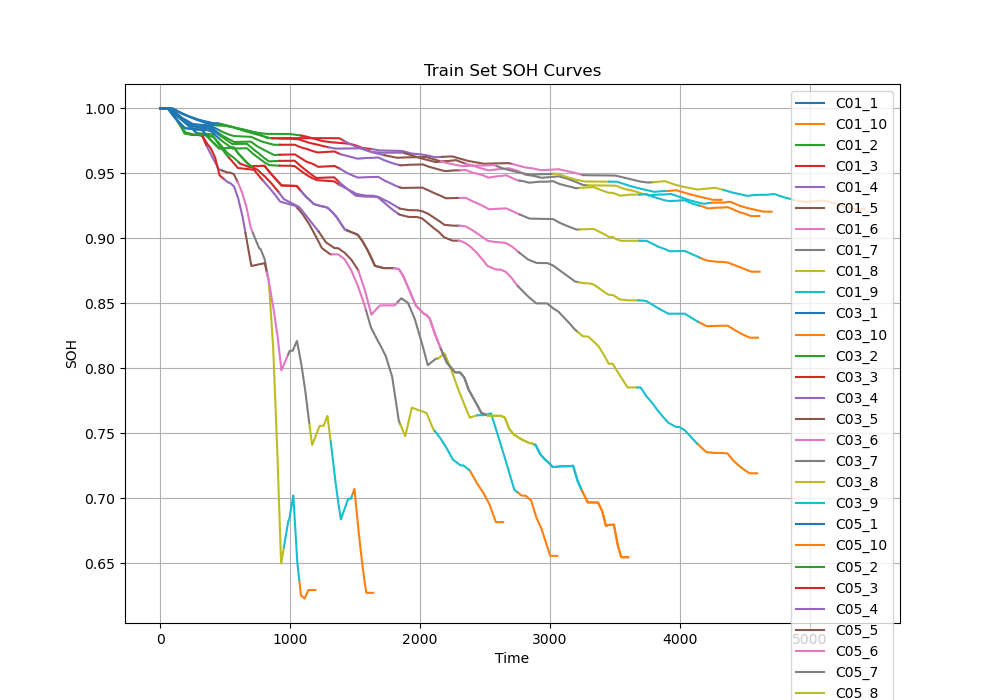

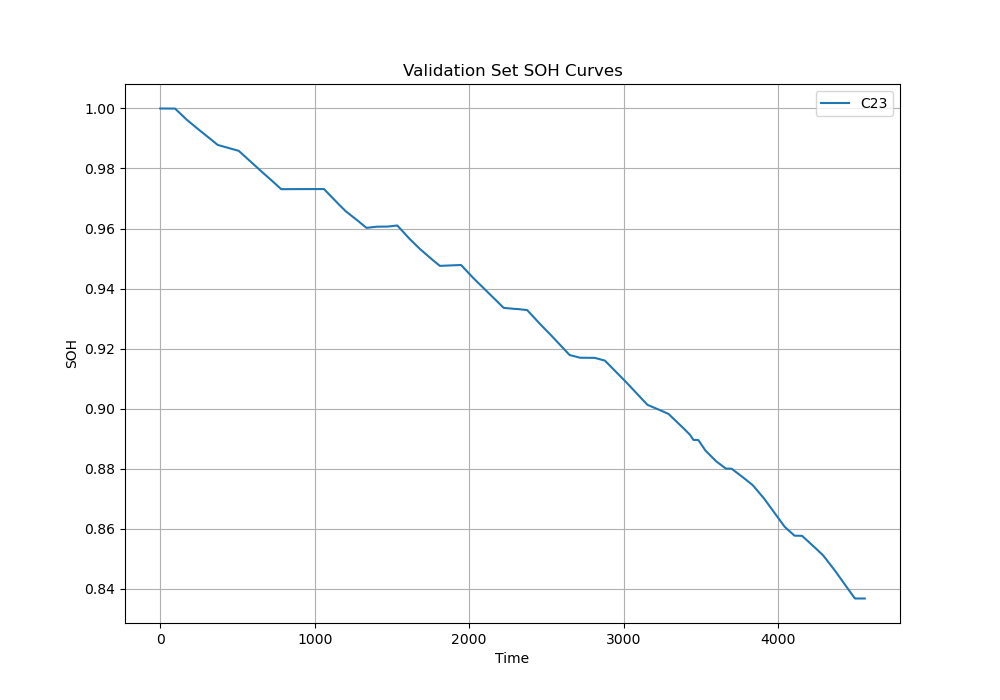

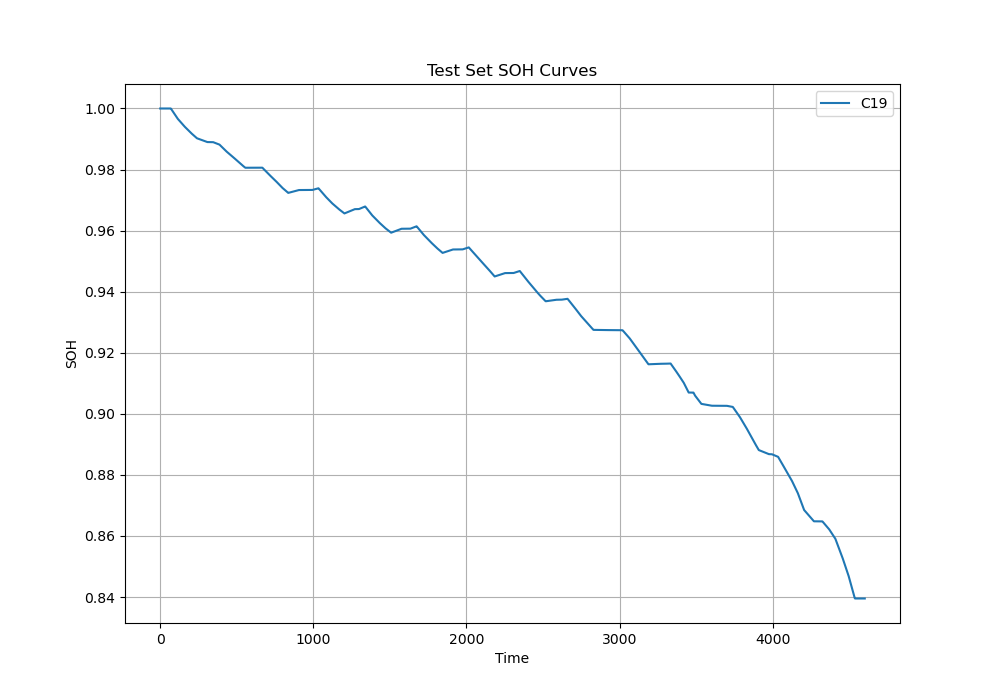

In [74]:
### Visualize data
# visualize_data(all_data)
# inspect_data_ranges(all_data)
# inspect_data_ranges(train_scaled)
plot_dataset_soh(train_df, "Train")
plot_dataset_soh(val_df, "Validation")
plot_dataset_soh(test_df, "Test")

In [ ]:
class SequenceDataset(Dataset):
    """
    Converts a DataFrame into sequence data for LSTM training.

    Each sample consists of:
      - X: A sequence of features with shape (seq_len, num_features)
      - y: The target value at the last time step of the sequence

    Assumes the DataFrame is already sorted if needed.

    Parameters:
        df (pd.DataFrame): DataFrame containing the data.
        seq_len (int): Sequence length.
        feature_cols (list): List of columns to use as input features.
        target_col (str): Column name for the target variable.
    """
    def __init__(self, df, seq_len=72,
                 feature_cols=["Current[A]", "Voltage[V]", "Temperature[°C]"],
                 target_col="SOH_ZHU"):
        self.seq_len = seq_len
        self.features = df[feature_cols].values
        self.targets = df[target_col].values

    def __len__(self):
        return len(self.features) - self.seq_len

    def __getitem__(self, idx):
        x = torch.tensor(self.features[idx : idx + self.seq_len], dtype=torch.float32)
        y = torch.tensor(self.targets[idx + self.seq_len], dtype=torch.float32)
        return x, y

seq_len=72
batch_size=16
train_cols = ["SOH_ZHU","Current[A]", "Voltage[V]", "Temperature[°C]"]
feature_cols=["Current[A]", "Voltage[V]", "Temperature[°C]"]
# train_cols = ["Current[A]", "Voltage[V]", "Temperature[°C]", "Q_sum", "EFC", 'InternalResistance[Ohms]']
# feature_cols=["Current[A]", "Voltage[V]", "Temperature[°C]", "Q_sum", "EFC", 'InternalResistance[Ohms]']
target_col="SOH_ZHU"

train_dataset = SequenceDataset(train_scaled, seq_len=seq_len, feature_cols=feature_cols, target_col=target_col)
val_dataset = SequenceDataset(val_scaled, seq_len=seq_len, feature_cols=feature_cols, target_col=target_col)
test_dataset = SequenceDataset(test_scaled, seq_len=seq_len, feature_cols=feature_cols, target_col=target_col)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, drop_last=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, drop_last=True)




In [111]:
x, y = val_dataset[0]
print("First sample X shape:", x.shape)
print("First sample y:", y)

First sample X shape: torch.Size([72, 4])
First sample y: tensor(0.7279)


In [118]:
class LSTMAttention(nn.Module):
    def __init__(self, input_dim: int, hidden_dim: int, num_layers: int, dropout: float):
        super(LSTMAttention, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.dropout = dropout
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True, dropout= dropout)
        # Attention layer: project hidden state at each time step to a scalar attention weight
        self.attention = nn.Linear(hidden_dim, 1)
        self.fc = nn.Linear(hidden_dim, 1)
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim, dtype=x.dtype, device=x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim, dtype=x.dtype, device=x.device)
        lstm_out, _ = self.lstm(x,(h0,c0))  # lstm_out shape: (batch_size, seq_len, hidden_dim)
        
        # # Compute attention scores and normalize them
        attn_scores = self.attention(lstm_out)  # shape: (batch_size, seq_len, 1)
        attn_weights = torch.softmax(attn_scores, dim=1)  # softmax over seq_len
        
        # # Compute the context vector as the weighted sum of LSTM outputs
        context = torch.sum(attn_weights * lstm_out, dim=1)  # shape: (batch_size, hidden_dim)
        out = self.fc(context )  # Final prediction, shape: (batch_size, 1)
        return out.squeeze(-1)

In [113]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
from tqdm import tqdm
import copy

def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=10, patience=10):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    
    history = {'train_loss': [], 'val_loss': []}
    
    best_val_loss = float('inf')
    epochs_no_improve = 0
    best_model_state = None

    
    for epoch in range(num_epochs):
        model.train()
        train_loss = []
        
        # Training loop with progress bar
        for X_batch, y_batch in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} Training", leave=False):
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())

        mean_train_loss = np.mean(train_loss)
        history['train_loss'].append(mean_train_loss)

        # Validation loop
        model.eval()
        val_loss = []
        with torch.no_grad():
            for X_val, y_val in val_loader:
                X_val, y_val = X_val.to(device), y_val.to(device)
                outputs = model(X_val)
                loss = criterion(outputs, y_val)
                val_loss.append(loss.item())
        mean_val_loss = np.mean(val_loss)
        history['val_loss'].append(mean_val_loss)

        print(f"Epoch [{epoch+1}/{num_epochs}] | Train Loss: {mean_train_loss:.4e} | Val Loss: {mean_val_loss:.4e}")

        # Early stopping check
        if mean_val_loss < best_val_loss:
            best_val_loss = mean_val_loss
            best_model_state = model.state_dict()
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= patience:
                print(f"Early stopping at epoch {epoch} because val_loss not improved.")
                break

    return history, best_model_state

# # Example usage:
# # Assume LSTMAttentionModel, train_loader, and val_loader have been defined elsewhere.
# def objective(trial):
#     # Suggest hyperparameters
#     hidden_size = trial.suggest_int('hidden_size', 10, 100)
#     num_layers = trial.suggest_int('num_layers', 1, 5)
#     learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-1, log=True)

#     # Instantiate model with suggested hyperparameters
#     model = LSTMAttention(input_dim=6, hidden_dim=hidden_size, num_layers=num_layers).type(torch.float32).to(device)

#     # Define your loss function and optimizer with suggested hyperparameters
#     criterion = nn.MSELoss()
#     optimizer = optim.Adam(model.parameters(), lr=learning_rate)

#     # Call your train and validate function
#     history, best_state = train_model(model, criterion, optimizer, train_loader, val_loader)

#     # Extract last validation loss
#     last_val_loss = history['val_loss'][-1]
#     return last_val_loss

#     # Optuna study
# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=10)

# # Extract best trial
# best_trial = study.best_trial
# print(f"Best trial: {best_trial}")

# best_hyperparams = study.best_trial.params
# print('Best hyperparameters:', best_hyperparams)
    



In [114]:
model = LSTMAttention(input_dim=4, hidden_dim=32, num_layers=2, dropout= 0.3)
optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-4)
criterion = nn.MSELoss()
history, best_state = train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=50, patience=10)

Epoch [1/50] | Train Loss: 8.0721e-02 | Val Loss: 5.4786e-04


Epoch [2/50] | Train Loss: 7.1423e-03 | Val Loss: 1.5525e-04


Epoch [3/50] | Train Loss: 5.1131e-03 | Val Loss: 1.0706e-04


Epoch [4/50] | Train Loss: 4.1209e-03 | Val Loss: 3.4858e-05


Epoch [5/50] | Train Loss: 3.5829e-03 | Val Loss: 8.7303e-05


Epoch [6/50] | Train Loss: 3.2926e-03 | Val Loss: 4.3246e-05


Epoch [7/50] | Train Loss: 3.0294e-03 | Val Loss: 4.9894e-05


Epoch [8/50] | Train Loss: 2.9293e-03 | Val Loss: 2.6509e-05


Epoch [9/50] | Train Loss: 2.8619e-03 | Val Loss: 4.6735e-05


Epoch [10/50] | Train Loss: 2.7461e-03 | Val Loss: 1.7064e-05


Epoch [11/50] | Train Loss: 2.6943e-03 | Val Loss: 1.7200e-05


Epoch [12/50] | Train Loss: 2.6777e-03 | Val Loss: 1.8606e-05


Epoch [13/50] | Train Loss: 2.6582e-03 | Val Loss: 1.6394e-05


Epoch [14/50] | Train Loss: 2.5963e-03 | Val Loss: 3.6762e-04


Epoch [15/50] | Train Loss: 2.6393e-03 | Val Loss: 4.5322e-05


Epoch [16/50] | Train Loss: 2.5597e-03 | Val Loss: 1.8909e-05


Epoch [17/50] | Train Loss: 2.5757e-03 | Val Loss: 1.5740e-05


Epoch [18/50] | Train Loss: 2.5708e-03 | Val Loss: 1.4932e-05


Epoch [19/50] | Train Loss: 2.5695e-03 | Val Loss: 2.9903e-05


Epoch [20/50] | Train Loss: 2.5502e-03 | Val Loss: 2.3129e-05


Epoch [21/50] | Train Loss: 2.5298e-03 | Val Loss: 1.4887e-05


Epoch [22/50] | Train Loss: 2.5329e-03 | Val Loss: 4.0964e-05


Epoch [23/50] | Train Loss: 2.5190e-03 | Val Loss: 1.6790e-05


Epoch [24/50] | Train Loss: 2.5109e-03 | Val Loss: 2.6040e-05


Epoch [25/50] | Train Loss: 2.4682e-03 | Val Loss: 1.6400e-05


Epoch [26/50] | Train Loss: 2.4909e-03 | Val Loss: 2.9652e-05


Epoch [27/50] | Train Loss: 2.4992e-03 | Val Loss: 2.0806e-05


Epoch [28/50] | Train Loss: 2.4797e-03 | Val Loss: 1.4452e-05


Epoch [29/50] | Train Loss: 2.4511e-03 | Val Loss: 1.6659e-05


Epoch [30/50] | Train Loss: 2.4983e-03 | Val Loss: 2.1003e-05


Epoch [31/50] | Train Loss: 2.4533e-03 | Val Loss: 1.7286e-05


Epoch [32/50] | Train Loss: 2.4856e-03 | Val Loss: 3.0816e-05


Epoch [33/50] | Train Loss: 2.4832e-03 | Val Loss: 1.7010e-05


Epoch [34/50] | Train Loss: 2.4636e-03 | Val Loss: 2.8201e-05


Epoch [35/50] | Train Loss: 2.4919e-03 | Val Loss: 1.4690e-05


Epoch [36/50] | Train Loss: 2.4430e-03 | Val Loss: 1.8013e-05


Epoch [37/50] | Train Loss: 2.4476e-03 | Val Loss: 2.3326e-05


Epoch [38/50] | Train Loss: 2.4322e-03 | Val Loss: 1.8098e-05
Early stopping at epoch 37 because val_loss not improved.


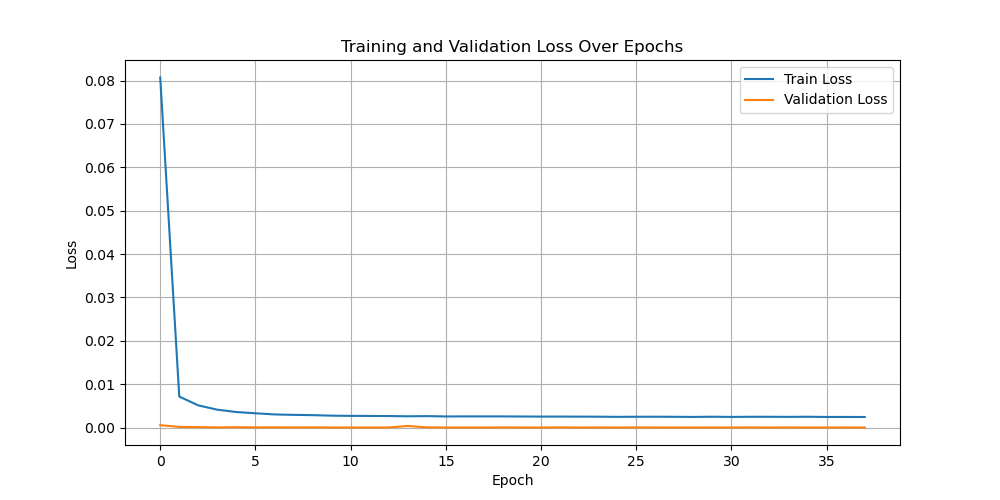

In [115]:
# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


In [91]:
def predict_autoregressive(model, df, seq_len=72,
                           input_cols=["Current[A]", "Voltage[V]", "Temperature[°C]",
                                       "Q_sum", "EFC", "InternalResistance[Ohms]", "SOH_ZHU"]):
    """
    Autoregressive prediction: Instead of using the true SOC for the next step,
    always use the last predicted SOC.
    
    Procedure:
    - Copy the data into data_array.
    - Use seq_len real values for the initial sequence.
    - Starting at i = seq_len, use only the predictions in the SOH field
      for subsequent predictions.
    
    Parameters:
        model: The trained PyTorch model.
        df (pd.DataFrame): DataFrame containing the data.
        seq_len (int): Sequence length.
        input_cols (list): List of columns for autoregressive prediction.
                           This list must include the target column ("SOH_ZHU").
    
    Returns:
        preds (np.ndarray): Array of predicted SOC values.
    """
    model.eval()
    # Copy the input columns data; note: input_cols must include the target "SOH_ZHU"
    data_array = df[input_cols].values.copy()
    preds = np.full(len(data_array), np.nan)
    
    # Find the index of the target column "SOH_ZHU" within input_cols
    target_idx = input_cols.index("SOH_ZHU")
    
    with torch.no_grad():
        for i in range(seq_len, len(data_array)):
            # Prepare input sequence of shape (seq_len, num_features)
            input_seq = data_array[i - seq_len : i]
            x_t = torch.tensor(input_seq, dtype=torch.float32).unsqueeze(0).to(device)
            
            # Get the predicted SOC value from the model
            pred_soh = model(x_t).item()
            preds[i] = pred_soh
            
            # Update the target column in data_array with the prediction
            data_array[i, target_idx] = pred_soh

    return preds

# Example usage:
preds_test = predict_autoregressive(model, test_scaled, seq_len=72)


RuntimeError: input.size(-1) must be equal to input_size. Expected 6, got 7

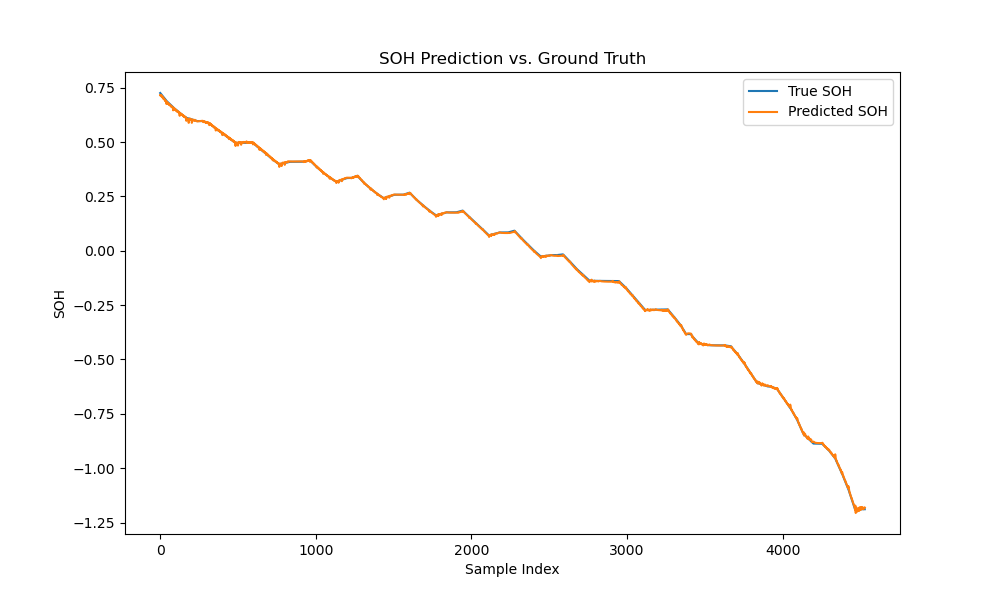

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import torch

def plot_soh_predictions(model, test_loader, device):
    """
    在测试集上运行模型并绘制真实SOH与预测SOH。
    参数:
        model: 训练好的模型
        test_loader: 测试集 DataLoader
        device: torch.device("cuda") 或 torch.device("cpu")
    """
    model.eval()
    model.to(device)
    
    all_preds = []
    all_targets = []
    
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)
            
            preds = model(X_batch)  # 形状 (batch_size, 1)
            
            # 将结果移动到 CPU，并转换为 NumPy 数组
            all_preds.append(preds.cpu().numpy())
            all_targets.append(y_batch.cpu().numpy())
    
    # 拼接所有批次的数据
    all_preds = np.concatenate(all_preds, axis=0).flatten()
    all_targets = np.concatenate(all_targets, axis=0).flatten()
    
    # 绘图
    plt.figure(figsize=(10, 6))
    plt.plot(all_targets, label='True SOH')
    plt.plot(all_preds, label='Predicted SOH')
    plt.xlabel('Sample Index')
    plt.ylabel('SOH')
    plt.title('SOH Prediction vs. Ground Truth')
    plt.legend()
    plt.show()

# 使用示例
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 假设你已经训练好模型 trained_model，并且有 test_loader
model = LSTMAttention(input_dim=4, hidden_dim=32, num_layers=2, dropout= 0.3)
model.load_state_dict(best_state)
plot_soh_predictions(model, test_loader, device)
